## Experiment 1 
- Seeing which algorithm converges faster given a particular unitary size and given resolution 
- Resolution ranges from [10,50] with a changed of 5 in between 
- Max iterations is 10 and error threshold is $10^{-3}$

In [4]:
resolutions = [i for i in range(10,55,5)]
resolutions 

[10, 15, 20, 25, 30, 35, 40, 45, 50]

In [5]:
from qiskit import QuantumCircuit, execute, transpile, Aer 
from qiskit.extensions import UnitaryGate,Initialize
from qiskit.quantum_info import Statevector 
from qiskit.tools.visualization import plot_bloch_vector
from qiskit.tools.visualization import plot_histogram,plot_bloch_multivector  
import numpy as np 
from time import sleep 
import sys 
import os 
from scipy.stats import unitary_group 
import matplotlib.pyplot as plt 
%matplotlib inline 

from qiskit import IBMQ 
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q-education')
santiago = provider.get_backend('ibmq_santiago')
casablanca = provider.get_backend('ibmq_casablanca')
bogota = provider.get_backend('ibmq_bogota')
sim = Aer.get_backend('qasm_simulator')
athens = provider.get_backend('ibmq_athens')

In [6]:
from normal_SPEA import SPEA 
from changed_SPEA import global_max_SPEA 

### Utils

In [7]:
def generate_plots(unitary_size,costs,errors,overlaps,algorithm):
    import random 
    colors = ['red','brown','cyan','green','grey','blue','purple','black','orange']
    c1,c2,c3 = random.sample(colors,3) 

    # plot 
    os.makedirs("Experiment_1/"+str(unitary_size)+"_qubit(random)/",exist_ok = True)
    # plot 1
    fig = plt.figure(figsize=(13,6))
    ax1 = fig.add_subplot(1,2,1)
    ax1.set_title(str(unitary_size)+" qubit "+algorithm+" Cost v/s Max iters",fontsize = 16)
    ax1.set_xlabel("Number of Resolutions ",fontsize = 15)
    ax1.set_ylabel("Metrics Returned for unitary ",fontsize = 15)
    ax1.plot(resolutions, costs, label = 'Costs of Unitary', marker = 'o',color = c1,alpha = 0.7)
    ax1.plot(resolutions, overlaps, label = 'Average overlap from nearest eigenvector',marker='s',color = c2,alpha = 0.6)
    ax1.legend(loc='best')
    ax1.grid()
    # plot 2
    ax2 = fig.add_subplot(1,2,2)
    ax2.set_title(str(unitary_size)+" qubit "+algorithm+" % error v/s Max iters",fontsize = 16)
    ax2.set_xlabel("Number of resolutions ",fontsize = 15)
    ax2.set_ylabel("% error for nearest eigenvalue",fontsize = 15)
    ax2.plot(resolutions, errors, label = 'Average error from nearest eigenvalue', marker = 'o',color = c3,alpha = 0.6)
    ax2.legend(loc = 'best')
    ax2.grid()
    # save axure
    fig.savefig("Experiment_1/"+str(unitary_size)+"_qubit(random)/"+algorithm+" Algorithm (alternate).JPG",dpi = 200)

In [8]:
def get_results(eig_vals,eig_vect,unitary,algorithm,experiments):
    '''Return the results of running the algorithm for this particular unitary matrix'''
    costs_g = []
    errors_g = []
    max_overlaps_g = []
    # find how the cost converges with increasing iterations
    for reso in resolutions:
        costs = []
        errors = []
        overlaps = []
        # run the experiments ...
        while len(costs) < experiments:
            if algorithm == 'original':
                spea = SPEA(unitary,resolution=reso,error = 3,max_iters=10)
            else:
                spea = global_max_SPEA(unitary,resolution=reso,error = 3,max_iters=10)

            result = spea.get_eigen_pair(progress=False,backend = sim,algo = 'alternate',randomize = True)
            
            if result['cost'] < 0.75:
                continue  
            # find the costs
            costs.append(result['cost'])
            theta = result['theta']
            res_state = result['state']

            # find the abs difference in this theta with the closest eigenvalue 
            # and append that to the errors ...
            min_error = 1e5
            for e in eig_vals:
                error = abs(e - theta)
                if error < min_error:
                    min_error = error 
                    perc_error = ((error)/e)*100 
            errors.append(perc_error)

            # find overlaps
            max_overlap = -1 
            for k in eig_vect:
                dot = np.linalg.norm(np.dot(k, res_state.conjugate().T))**2
                max_overlap = max(max_overlap,dot)
            overlaps.append(max_overlap)

        print("Result with",reso," resolutions :")
        print("AVG. COST :",np.average(costs), "AVG. ERROR :", np.average(errors))
        # append the average result of your algorithm ...
        costs_g.append(np.average(costs))
        errors_g.append(np.average(errors))
        max_overlaps_g.append(np.average(overlaps))
    
    return costs_g, errors_g, max_overlaps_g 

## 1 - qubit 

In [9]:
unit = unitary_group.rvs(2)
unit 

array([[ 0.11073695-0.94848246j,  0.14141265+0.26099963j],
       [-0.05886911+0.29095149j,  0.38337474+0.87458874j]])

In [10]:
eig_vals1, eig_vect1 = np.linalg.eig(unit)
eig_vals1 = np.angle(eig_vals1)
e = []
for k in eig_vals1:
    if k < 0:
        v = (k + 2*np.pi )/(2*np.pi)
    else:
        v = (k)/(2*np.pi)
    e.append(v)
eig_vals1 = np.array(e) 
print("Eigenstates :",eig_vect1)
print("Eigenvalues :",eig_vals1)

Eigenstates : [[ 0.98788897+0.j          0.14585691-0.05292585j]
 [-0.14585691-0.05292585j  0.98788897+0.j        ]]
Eigenvalues : [0.76655666 0.18619072]


- Algorithm 1

In [11]:
costs_1qubit_b, errors_eig_1qubit_b, max_overlaps_1qubit_b = get_results(eig_vals1, eig_vect1, unit, 'original', 4)

Maximum iterations reached for the estimation.
Terminating algorithm...
Maximum iterations reached for the estimation.
Terminating algorithm...
Maximum iterations reached for the estimation.
Terminating algorithm...
Maximum iterations reached for the estimation.
Terminating algorithm...
Maximum iterations reached for the estimation.
Terminating algorithm...
Result with 10  resolutions :
AVG. COST : 0.9365234375 AVG. ERROR : 2.1213356607259475
Maximum iterations reached for the estimation.
Terminating algorithm...
Maximum iterations reached for the estimation.
Terminating algorithm...
Maximum iterations reached for the estimation.
Terminating algorithm...
Maximum iterations reached for the estimation.
Terminating algorithm...
Result with 15  resolutions :
AVG. COST : 0.92041015625 AVG. ERROR : 1.431900860191458
Maximum iterations reached for the estimation.
Terminating algorithm...
Maximum iterations reached for the estimation.
Terminating algorithm...
Maximum iterations reached for the

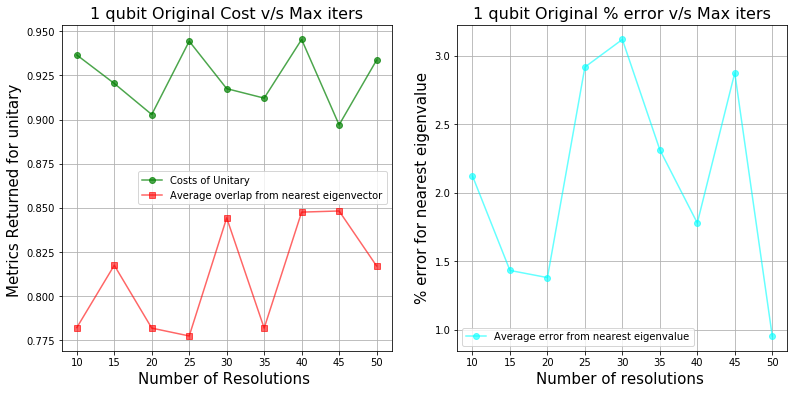

In [12]:
generate_plots(1,costs_1qubit_b,errors_eig_1qubit_b,max_overlaps_1qubit_b,"Original")

- Algorithm 2

Maximum iterations reached for the estimation.
Terminating algorithm...
Maximum iterations reached for the estimation.
Terminating algorithm...
Maximum iterations reached for the estimation.
Terminating algorithm...
Maximum iterations reached for the estimation.
Terminating algorithm...
Result with 10  resolutions :
AVG. COST : 0.9267578125 AVG. ERROR : 3.377585855572905
Maximum iterations reached for the estimation.
Terminating algorithm...
Maximum iterations reached for the estimation.
Terminating algorithm...
Maximum iterations reached for the estimation.
Terminating algorithm...
Maximum iterations reached for the estimation.
Terminating algorithm...
Result with 15  resolutions :
AVG. COST : 0.90185546875 AVG. ERROR : 4.5417568664254375
Maximum iterations reached for the estimation.
Terminating algorithm...
Maximum iterations reached for the estimation.
Terminating algorithm...
Maximum iterations reached for the estimation.
Terminating algorithm...
Maximum iterations reached for the

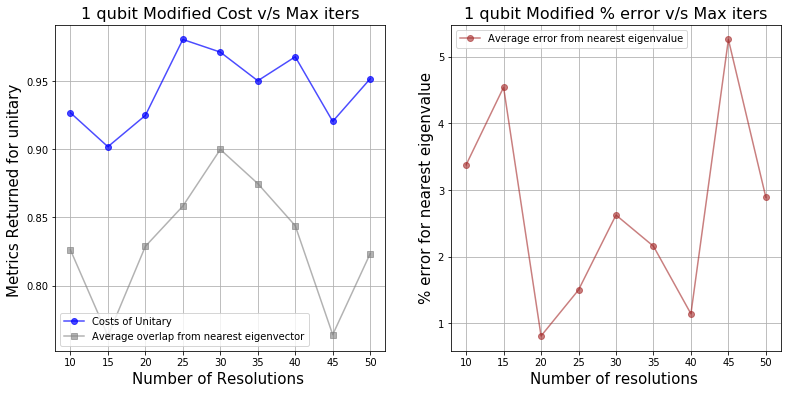

In [13]:
costs_1qubit_c, errors_eig_1qubit_c, max_overlaps_1qubit_c = get_results(eig_vals1, eig_vect1, unit, 'modified', 4)
generate_plots(1,costs_1qubit_c,errors_eig_1qubit_c,max_overlaps_1qubit_c,"Modified")

## 2 - qubit


In [14]:
unit_2 =  unitary_group.rvs(4)
unit_2

array([[ 0.27505936+0.00645258j,  0.44863856+0.72553665j,
         0.3752356 +0.03831551j, -0.23303225-0.00684537j],
       [ 0.34615397+0.17145691j,  0.02547413-0.21887453j,
         0.51310394-0.01513982j,  0.6163496 -0.39853892j],
       [-0.75708087+0.35504519j,  0.28772232+0.05866465j,
         0.07577302-0.0599602j , -0.02176451-0.45247688j],
       [ 0.09770318-0.25749996j,  0.22769298-0.2927375j ,
        -0.03127261+0.7641404j , -0.27925546-0.35176182j]])

In [15]:
eig_vals2, eig_vect2 = np.linalg.eig(unit_2)
eig_vals2 = np.angle(eig_vals2)
e = []
for k in eig_vals2:
    if k < 0:
        v = (k + 2*np.pi )/(2*np.pi)
    else:
        v = (k)/(2*np.pi)
    e.append(v)
eig_vals2 = np.array(e) 
print("Eigenstates :",eig_vect2)
print("Eigenvalues :",eig_vals2)

Eigenstates : [[ 0.68718576+0.j          0.06947545+0.41353228j  0.54693706+0.j
   0.11910972+0.19650108j]
 [ 0.44031286+0.06246635j  0.54507077+0.j         -0.45295293+0.20367986j
  -0.47366675-0.18468451j]
 [ 0.12323078+0.52044722j  0.28780306-0.43983698j -0.07799371-0.39729558j
   0.23607055+0.46691069j]
 [-0.20776996+0.02790663j  0.47511451+0.1582438j  -0.05924252+0.53551054j
   0.64420241+0.j        ]]
Eigenvalues : [0.14647113 0.91205339 0.69131844 0.49399004]



### Algorithm 1

Maximum iterations reached for the estimation.
Terminating algorithm...
Maximum iterations reached for the estimation.
Terminating algorithm...
Maximum iterations reached for the estimation.
Terminating algorithm...
Maximum iterations reached for the estimation.
Terminating algorithm...
Maximum iterations reached for the estimation.
Terminating algorithm...
Result with 10  resolutions :
AVG. COST : 0.92333984375 AVG. ERROR : 5.040941023863888
Maximum iterations reached for the estimation.
Terminating algorithm...
Maximum iterations reached for the estimation.
Terminating algorithm...
Maximum iterations reached for the estimation.
Terminating algorithm...
Maximum iterations reached for the estimation.
Terminating algorithm...
Result with 15  resolutions :
AVG. COST : 0.91357421875 AVG. ERROR : 3.3373708213708495
Maximum iterations reached for the estimation.
Terminating algorithm...
Maximum iterations reached for the estimation.
Terminating algorithm...
Maximum iterations reached for th

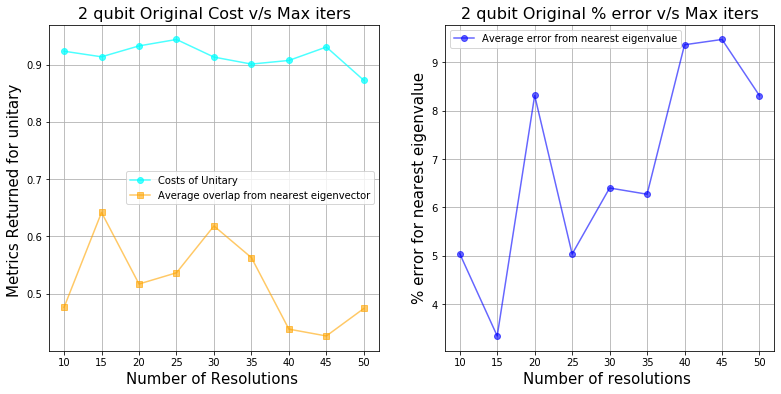

In [16]:
costs_2qubit_b, errors_eig_2qubit_b, max_overlaps_2qubit_b = get_results(eig_vals2, eig_vect2, unit_2, 'original', 4)
generate_plots(2,costs_2qubit_b,errors_eig_2qubit_b,max_overlaps_2qubit_b,"Original")

### Algorithm 2

Maximum iterations reached for the estimation.
Terminating algorithm...
Maximum iterations reached for the estimation.
Terminating algorithm...
Maximum iterations reached for the estimation.
Terminating algorithm...
Maximum iterations reached for the estimation.
Terminating algorithm...
Result with 10  resolutions :
AVG. COST : 0.87353515625 AVG. ERROR : 7.876539648070383
Maximum iterations reached for the estimation.
Terminating algorithm...
Maximum iterations reached for the estimation.
Terminating algorithm...
Maximum iterations reached for the estimation.
Terminating algorithm...
Maximum iterations reached for the estimation.
Terminating algorithm...
Maximum iterations reached for the estimation.
Terminating algorithm...
Result with 15  resolutions :
AVG. COST : 0.876953125 AVG. ERROR : 13.663605571349283
Maximum iterations reached for the estimation.
Terminating algorithm...
Maximum iterations reached for the estimation.
Terminating algorithm...
Maximum iterations reached for the 

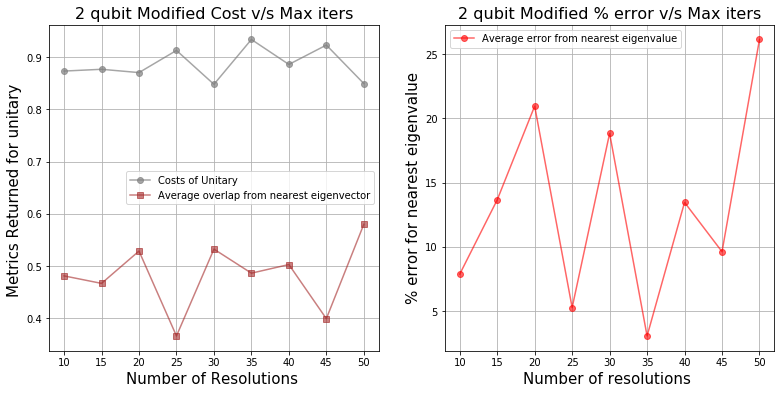

In [17]:
costs_2qubit_c, errors_eig_2qubit_c, max_overlaps_2qubit_c = get_results(eig_vals2, eig_vect2, unit_2, 'modified', 4)
generate_plots(2,costs_2qubit_c,errors_eig_2qubit_c,max_overlaps_2qubit_c,"Modified")

## 3 - qubit

In [5]:
unit_3 = unitary_group.rvs(8)
unit_3 

array([[ 0.23787835-0.19862312j, -0.30496264-0.09724394j,
        -0.05219029+0.01052784j,  0.4311176 -0.22469314j,
        -0.08168965-0.08379736j,  0.0638596 +0.15585857j,
         0.4663071 -0.35256853j,  0.06859403-0.41689679j],
       [ 0.32391133-0.51726953j,  0.03790513+0.23710263j,
         0.01543257-0.16152823j, -0.01710495+0.46568308j,
        -0.18622522-0.20137389j,  0.03708321+0.27529059j,
        -0.00799152-0.16299637j, -0.08943181+0.37330324j],
       [ 0.21096375-0.29415246j, -0.10483265+0.16317682j,
         0.09829065-0.02480259j,  0.0075889 +0.01455218j,
         0.5913661 +0.00483431j,  0.17324549+0.1239067j ,
        -0.40656646+0.23704067j,  0.25889731-0.3703917j ],
       [ 0.16733083+0.15126945j,  0.18477898+0.66950508j,
        -0.07320631-0.29774164j,  0.38031581-0.20893863j,
         0.03181026+0.13464198j, -0.34872272-0.16408119j,
         0.0505912 +0.10152586j,  0.00071655+0.06240915j],
       [ 0.24225214-0.22664599j, -0.16546609-0.45464592j,
        -0

- Algorithm 1

In [ ]:
costs = []
thetas = []
# find how the cost converges with increasing resolution
for res in resolutions:
    spea = SPEA(unit_3,resolution=res,error = 3,max_iters=10)
    result = spea.get_eigen_pair(progress=False,backend = casablanca)
    print("Result with",res," resolution :",result)
    costs.append(result['cost'])
    thetas.append(result['theta'])
# plot 
plt.title("3-qubit(basic) unitary cost v/s resolution",fontsize = 16)
plt.xlabel("Resolution  ",fontsize = 15)
plt.ylabel("Cost Returned for unitary ",fontsize = 15)
plt.plot(resolutions, costs, label = 'Costs of unitary', marker = 's',color = 'black',alpha = 0.5)
plt.plot(resolutions, thetas, label = 'Eigenvalues', marker = 'o',color = 'magenta',alpha = 0.5)

plt.legend()
plt.grid()
os.makedirs("SPE/Experiment_1/3_qubit/",exist_ok = True)
plt.savefig("SPE/Experiment_1/3_qubit/Basic Algorithm Result",dpi = 200)

- Algorithm 2

In [ ]:
costs = []
thetas = []
# find how the cost converges with increasing resolution
for res in resolutions:
    spea = global_max_SPEA(unit_3,resolution=res,error = 3,max_iters=10)
    result = spea.get_eigen_pair(progress=False,backend = casablanca)
    print("Result with",res," resolution :",result)
    costs.append(result['cost'])
    thetas.append(result['theta'])
    
# plot 
plt.title("3-qubit(modified) unitary cost v/s resolution",fontsize = 16)
plt.xlabel("Resolution ",fontsize = 15)
plt.ylabel("Cost Returned for unitary ",fontsize = 15)
plt.plot(resolutions, costs, label = 'Costs of unitary', marker = 's',color = 'g',alpha = 0.5)
plt.plot(resolutions, thetas, label = 'Eigenvalues', marker = 'o',color = 'yellow',alpha = 0.5)
plt.legend()
plt.grid()
os.makedirs("SPE/Experiment_1/3_qubit/",exist_ok = True)
plt.savefig("SPE/Experiment_1/3_qubit/Modified Algorithm Result",dpi = 200)

## 4 - qubit

In [ ]:
unit_4 = unitary_group.rvs(16)
unit_4

- Algorithm 1

In [ ]:
costs = []
thetas = []
# find how the cost converges with increasing resolution
for res in resolutions:
    spea = SPEA(unit_4,resolution=res,error = 3,max_iters=10)
    result = spea.get_eigen_pair(progress=False,backend = casablanca)
    print("Result with",res," resolution :",result)
    costs.append(result['cost'])
    thetas.append(result['theta'])
# plot 
plt.title("4-qubit(basic) unitary cost v/s resolution",fontsize = 16)
plt.xlabel("Resolution ",fontsize = 15)
plt.ylabel("Cost Returned for unitary ",fontsize = 15)
plt.plot(resolutions, costs, label = 'Costs of unitary', marker = 's',color = 'red',alpha = 0.5)
plt.plot(resolutions, thetas, label = 'Eigenvalues', marker = 'o',color = 'cyan',alpha = 0.5)
plt.legend()
plt.grid()
os.makedirs("SPE/Experiment_1/4_qubit/",exist_ok = True)
plt.savefig("SPE/Experiment_1/4_qubit/Basic Algorithm Result",dpi = 200)

- Algorithm 2

In [ ]:
costs = []
thetas = []
# find how the cost converges with increasing resolution
for res in resolutions:
    spea = global_max_SPEA(unit_4,resolution=res,error = 3,max_iters=10)
    result = spea.get_eigen_pair(progress=False,backend = casablanca)
    print("Result with",res," resolution :",result)
    costs.append(result['cost'])
    thetas.append(result['theta'])
    
# plot 
plt.title("4-qubit(modified) unitary cost v/s resolution",fontsize = 16)
plt.xlabel("Resolution ",fontsize = 15)
plt.ylabel("Cost Returned for unitary ",fontsize = 15)
plt.plot(resolutions, costs, label = 'Costs of unitary', marker = 's',color = 'yellow',alpha = 0.7)
plt.plot(resolutions, thetas, label = 'Eigenvalues', marker = 'o',color = 'brown',alpha = 0.5)
plt.legend()
plt.grid()
os.makedirs("SPE/Experiment_1/4_qubit/",exist_ok = True)
plt.savefig("SPE/Experiment_1/4_qubit/Modified Algorithm Result",dpi = 200)

In [ ]:
unit_5 = unitary_group.rvs(32)
unit_5 

- Algorithm 1

In [ ]:
costs = []
# find how the cost converges with increasing resolution
for res in resolutions:
    spea = SPEA(unit_5,resolution=res,error = 3,max_iters=10)
    result = spea.get_eigen_pair(progress=False,backend = casablanca)
    print("Result with",res," resolution :",result)
    costs.append(result['cost'])
    
# plot 
plt.title("5-qubit(basic) unitary cost v/s resolution",fontsize = 16)
plt.xlabel("Resolution ",fontsize = 15)
plt.ylabel("Cost Returned for unitary ",fontsize = 15)
plt.plot(resolutions, costs, label = 'Costs of unitary', marker = 's',color = 'b',alpha = 0.5)
plt.legend()
plt.grid()
os.makedirs("SPE/Experiment_1/5_qubit/",exist_ok = True)
plt.savefig("SPE/Experiment_1/5_qubit/Basic Algorithm Result",dpi = 200)

- Algorithm 2

In [ ]:
costs = []
# find how the cost converges with increasing resolution
for res in resolutions:
    spea = global_max_SPEA(unit_5,resolution=res,error = 3,max_iters=10)
    result = spea.get_eigen_pair(progress=False,backend = casablanca)
    print("Result with",res," resolution :",result)
    costs.append(result['cost'])
    
# plot 
plt.title("5-qubit(basic) unitary cost v/s resolution",fontsize = 16)
plt.xlabel("Resolution ",fontsize = 15)
plt.ylabel("Cost Returned for unitary ",fontsize = 15)
plt.plot(resolutions, costs, label = 'Costs of unitary', marker = 's',color = 'magenta',alpha = 0.5)
plt.legend()
plt.grid()
os.makedirs("SPE/Experiment_1/5_qubit/",exist_ok = True)
plt.savefig("SPE/Experiment_1/5_qubit/Modified Algorithm Result",dpi = 200)